In [ ]:
import pandas as pd

In [ ]:
x=pd.read_csv("/content/netflix1.csv")

In [ ]:
df=pd.DataFrame(x)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#conversion of date_added column to datetime data type from object data type
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
import seaborn as sns

<Axes: >

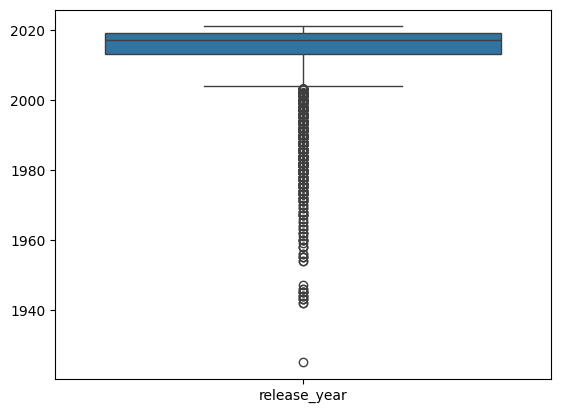

In [ ]:
sns.boxplot(data=df)

Here I am not removing any outliers because some movies are released 1940,1960 no need to remove the outliers

In [ ]:
# Basic statistics
df.describe()
df['type'].value_counts()


,count
type,
Movie,6126
TV Show,2664


In [ ]:
#taking only 40 rows for histogram visualisation
df2=df.head(40)

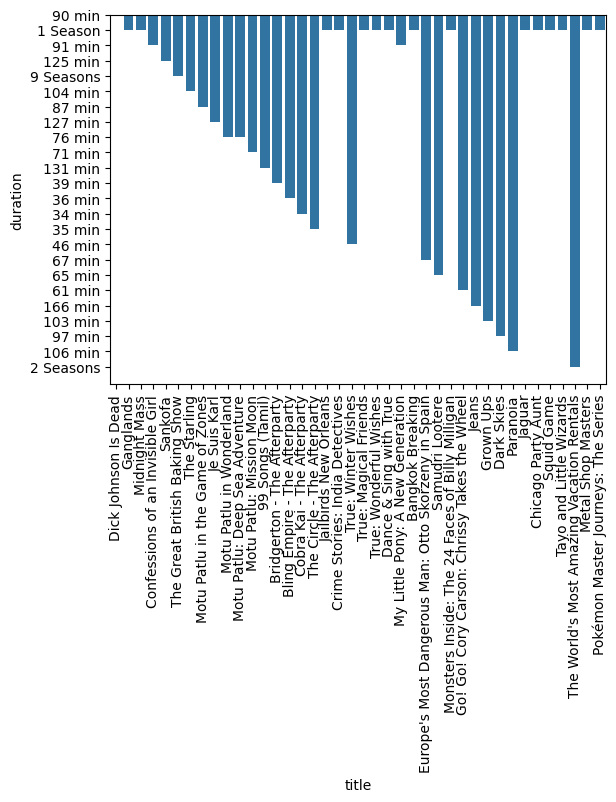

In [ ]:
#visualising data title v/s duration clearly to see full
import matplotlib.pyplot as plt
sns.barplot(x='title',y='duration',data=df2)
plt.xticks(rotation=90)
plt.show()

The chart shows durations of Netflix titles, mixing minutes for movies and seasons for TV shows.

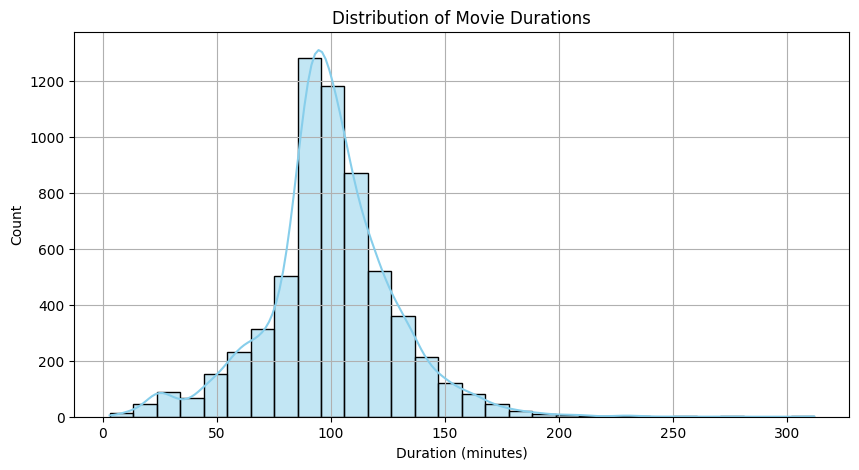

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (assuming format like "90 min")
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Plot improved histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=movies_df, x='duration_minutes', bins=30, kde=True, color='skyblue')
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()


Most Netflix movies are between 80 and 110 minutes long, with a peak around 90 minutes.
The distribution is right-skewed, meaning a few movies are much longer.
This shows that Netflix mainly focuses on standard-length movies.

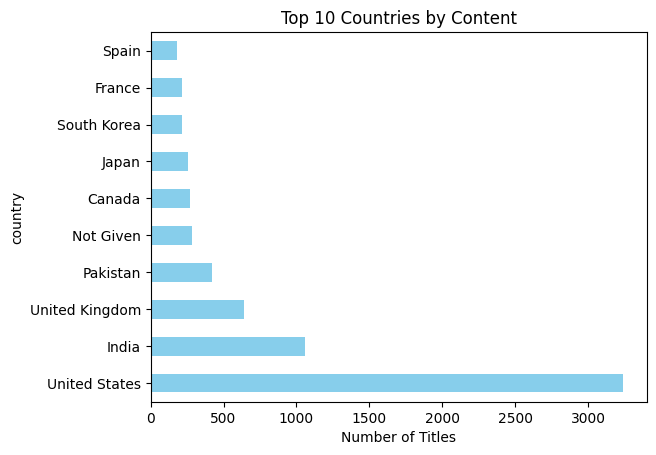

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.show()


The United States has the highest number of Netflix titles, far ahead of other countries.
India and the UK follow, while countries like Spain, France, and Japan contribute less content.











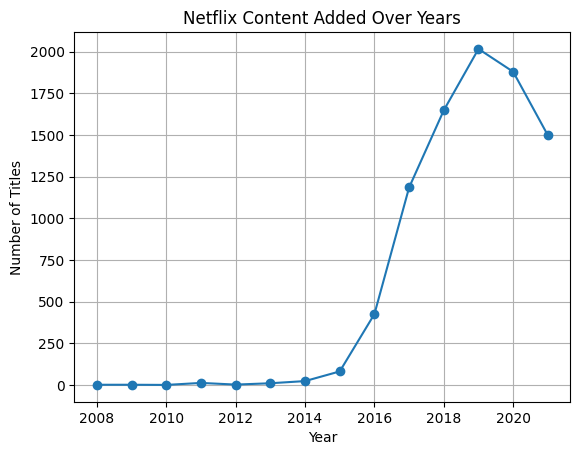

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


Netflix content grew rapidly from 2016, peaking in 2019 with the highest number of new titles.
After 2019, the number of new additions declined slightly, possibly due to market saturation or the pandemic.

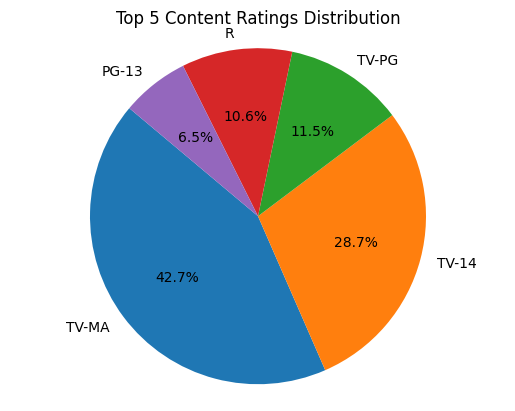

In [ ]:
rating_counts = df['rating'].value_counts().head(5)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Content Ratings Distribution")
plt.axis('equal')
plt.show()


Most of the content is for older viewers, with TV-MA and TV-14 making up the biggest parts. Very little content is made for younger audiences like PG-13 or TV-PG.









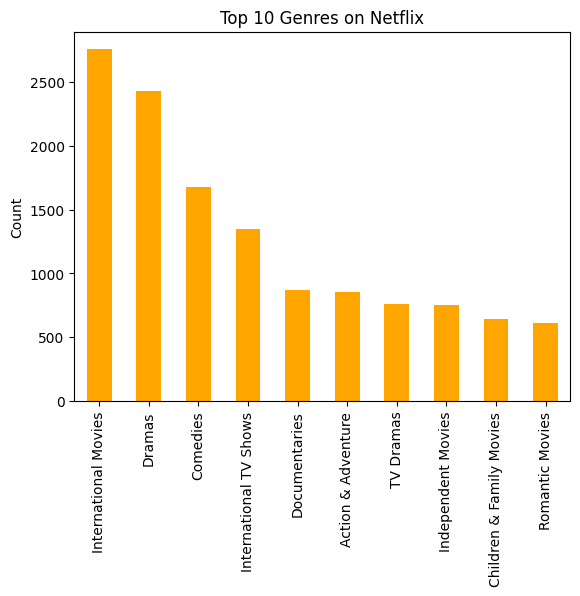

In [ ]:
from collections import Counter

genres = df['listed_in'].str.split(', ')
genre_list = genres.sum()
top_genres = pd.Series(Counter(genre_list)).sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='orange')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()


The bar chart shows that International Movies, Dramas, and Comedies are the most popular genres on Netflix. Genres like Romantic Movies and Children & Family Movies have the fewest titles among the top 10.









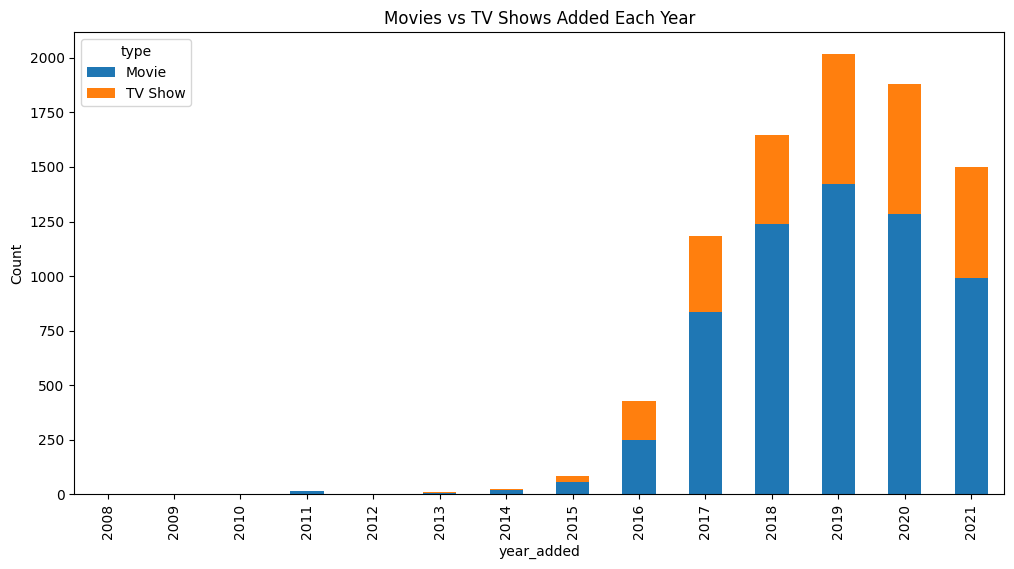

In [ ]:
content_by_year = df.groupby(['year_added', 'type']).size().unstack()
content_by_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Movies vs TV Shows Added Each Year")
plt.ylabel("Count")
plt.show()


The chart shows that Netflix rapidly increased its content from 2016 onward, with a peak in 2019. Movies were added more than TV shows every year, but both types saw major growth, especially between 2016 and 2019.









In [ ]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




In [ ]:
# Encode categorical columns
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Select features and target
X = df[['release_year']]  # You can choose other features as well
y = df['type']


In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7042093287827076
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83      1238
           1       0.00      0.00      0.00       520

    accuracy                           0.70      1758
   macro avg       0.35      0.50      0.41      1758
weighted avg       0.50      0.70      0.58      1758



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


conclusion:
Through this project, we successfully loaded, cleaned, and analyzed Netflix’s dataset using Python. I  uncovered insightful patterns such as the rise in content over the years, top contributing countries, popular genres, and movie durations. Visualization helped highlight key trends in what Netflix offers, while a basic machine learning model showed potential for predicting content types—though with room for improvement. This foundation prepares the data well for deeper machine learning tasks in the future